# Tes `SORA` dengan data HD 93273

In [2]:
%config InlineBackend.figure_format = 'retina'

from sora import LightCurve, Body, Star, Observer, Occultation
import arviz as az
az.style.use('arviz-darkgrid')

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import os

from astropy.time import Time
import astropy.units as u

import numpy as np

from skyfield.api import load

# plt.rcParams['figure.figsize'] = (12,5)

pd.set_option('display.float_format',  '{:}'.format)

SORA version: 0.2.1


In [3]:
df = pd.read_csv('hd93273.csv', sep=',')
df.tail()

,FrameNum,timeInfo,signal-obj,appsum-obj,avgbkg-obj,stdbkg-obj,nmaskpx-obj,maxpx-obj,xcentroid-obj,ycentroid-obj
896,3596.0,[11:59:12.3843786],11668.0,108768.0,651.68,745.16,-149,9920,369.0,289.0
897,3597.0,[11:59:12.4042764],10655.0,104688.0,631.09,725.86,-149,7568,369.0,289.0
898,3598.0,[11:59:12.4243837],14821.0,114256.0,667.35,767.46,-149,9920,369.0,289.0
899,3599.0,[11:59:12.4444004],2600.0,96224.0,628.35,731.02,-149,7072,369.0,289.0
900,3600.0,[11:59:12.4645555],14821.0,108288.0,627.29,726.11,-149,7696,369.0,289.0


In [4]:
# hilangkan karakter [ dan ] dari data
df['timeInfo'] = df['timeInfo'].map((lambda x: x.lstrip('[').rstrip(']')))

# ubah ke format waktu dan ambil tanggal dan jamnya
df['timeInfo'] = pd.to_datetime(df['timeInfo'])

df.tail()

,FrameNum,timeInfo,signal-obj,appsum-obj,avgbkg-obj,stdbkg-obj,nmaskpx-obj,maxpx-obj,xcentroid-obj,ycentroid-obj
896,3596.0,2022-08-01 11:59:12.384378,11668.0,108768.0,651.68,745.16,-149,9920,369.0,289.0
897,3597.0,2022-08-01 11:59:12.404276,10655.0,104688.0,631.09,725.86,-149,7568,369.0,289.0
898,3598.0,2022-08-01 11:59:12.424383,14821.0,114256.0,667.35,767.46,-149,9920,369.0,289.0
899,3599.0,2022-08-01 11:59:12.444400,2600.0,96224.0,628.35,731.02,-149,7072,369.0,289.0
900,3600.0,2022-08-01 11:59:12.464555,14821.0,108288.0,627.29,726.11,-149,7696,369.0,289.0


In [5]:
data = df[['FrameNum','timeInfo','signal-obj']]
data.columns = ['Frame','Time', 'Value']
data.tail()

,Frame,Time,Value
896,3596.0,2022-08-01 11:59:12.384378,11668.0
897,3597.0,2022-08-01 11:59:12.404276,10655.0
898,3598.0,2022-08-01 11:59:12.424383,14821.0
899,3599.0,2022-08-01 11:59:12.444400,2600.0
900,3600.0,2022-08-01 11:59:12.464555,14821.0


In [6]:
data_cp = data.copy()

data_cp['JD'] = Time(data_cp['Time']).jd

data_cp['frac_JD'] = data_cp['JD'] - np.floor(data_cp['JD']).astype(int)
data_cp

,Frame,Time,Value,JD,frac_JD
0,2700.0,2022-08-01 11:58:54.462258,109748.0,2459792.9992414615,0.9992414615117013
1,2701.0,2022-08-01 11:58:54.482504,167147.0,2459792.9992416957,0.9992416957393289
2,2702.0,2022-08-01 11:58:54.502225,219629.0,2459792.999241924,0.9992419239133596
3,2703.0,2022-08-01 11:58:54.522305,188359.0,2459792.9992421563,0.999242156278342
4,2704.0,2022-08-01 11:58:54.542235,114788.0,2459792.999242387,0.9992423867806792
...,...,...,...,...,...
896,3596.0,2022-08-01 11:59:12.384378,11668.0,2459792.999448893,0.9994488931261003
897,3597.0,2022-08-01 11:59:12.404276,10655.0,2459792.9994491236,0.9994491236284375
898,3598.0,2022-08-01 11:59:12.424383,14821.0,2459792.9994493565,0.9994493564590812
899,3599.0,2022-08-01 11:59:12.444400,2600.0,2459792.999449588,0.999449587892741


Text(0.5, 0, 'Frames')

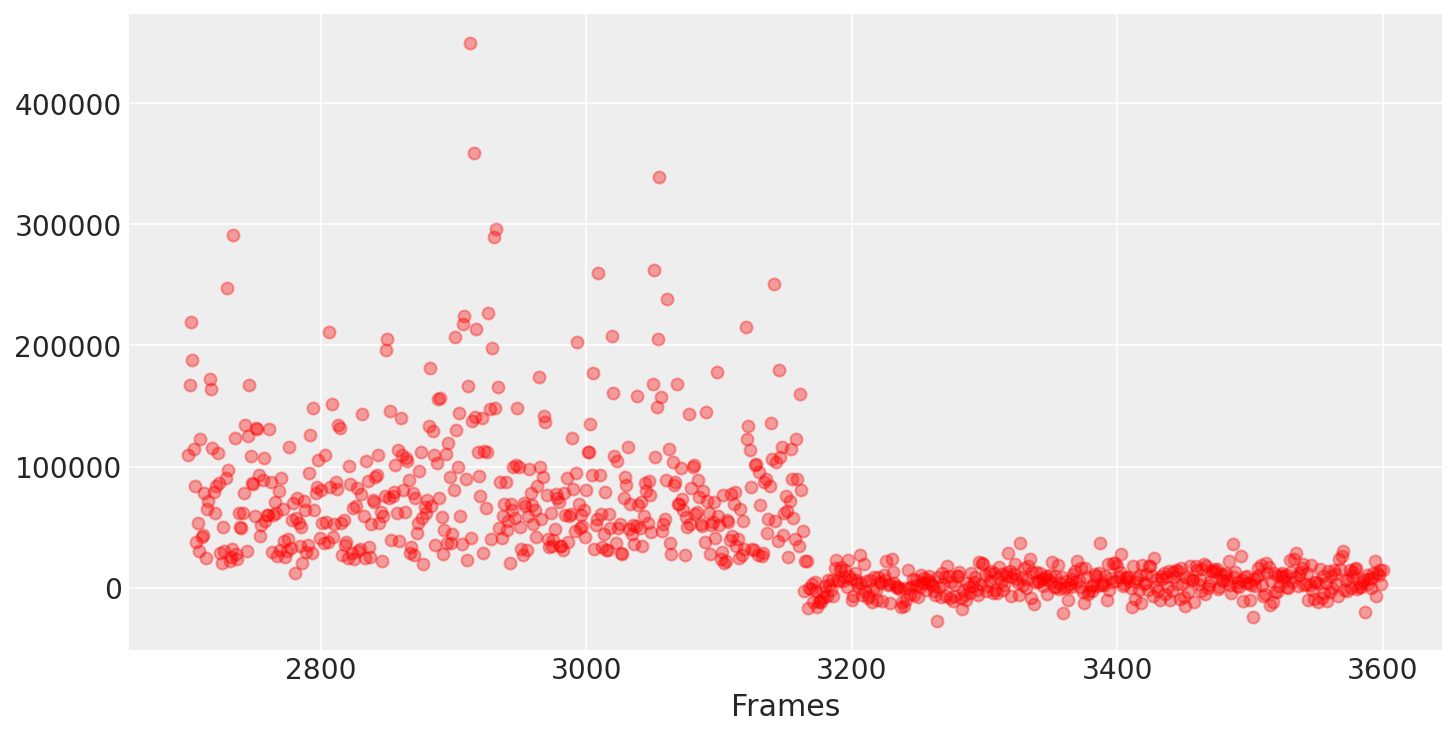

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_cp['Frame'], data_cp['Value'], 'ro', alpha=0.35)
# ax.set_xlim(3300, 3700)
ax.set_xlabel('Frames')

## *Data smoothing*

In [8]:
# from scipy.signal import savgol_filter

# x = data_cp['Frame']
# y = data_cp['Value']
# y_filtered = savgol_filter(y, 10, 3)

In [9]:
# plt.figure(figsize=(10,5))
# plt.scatter(x, y_filtered, c='r', marker='o', alpha=0.3)
# # plt.xlim(3300, 3700)

## Normalisasi

Text(0.5, 0, 'Frames')

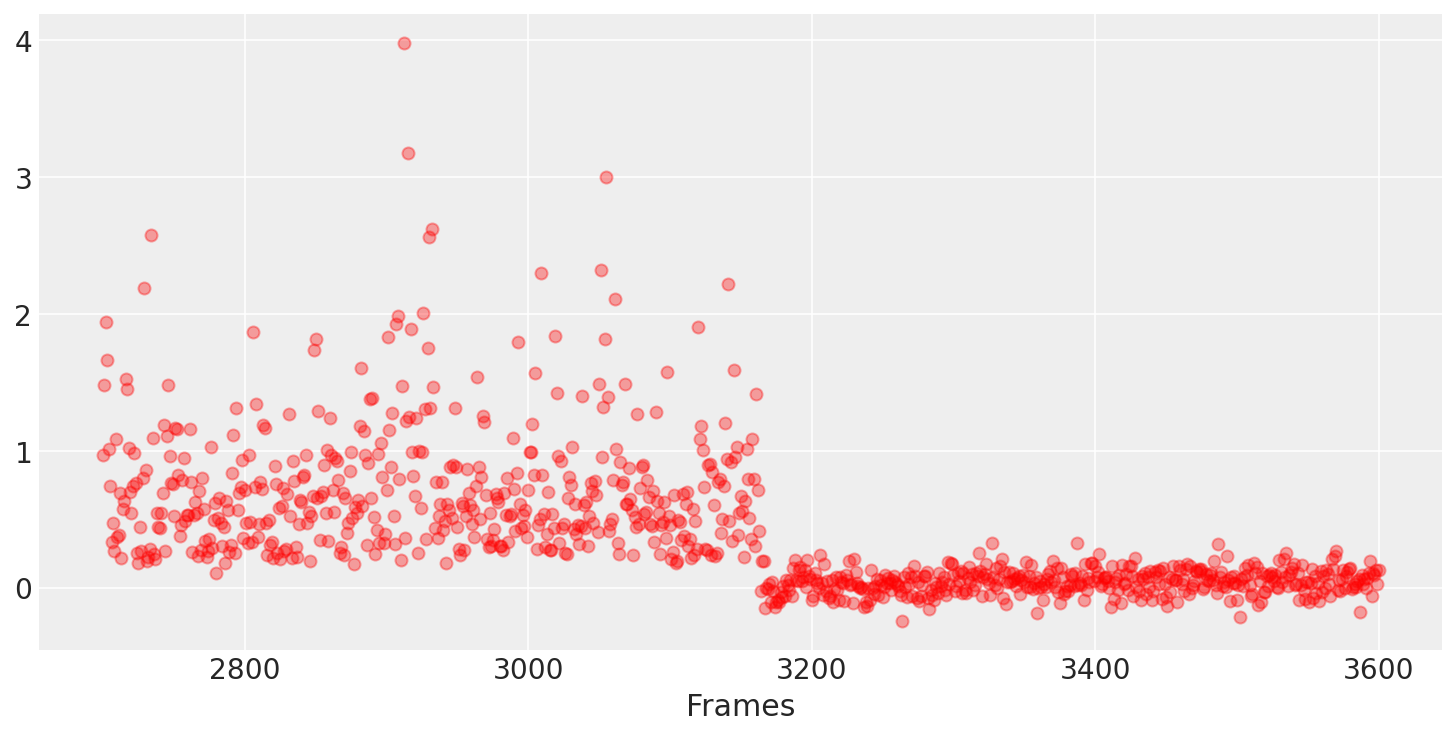

In [10]:
# data_cp['y_scaled'] = y_filtered/(y_filtered.std()*2)

data_cp['y_scaled'] = data_cp['Value']/(data_cp['Value'].std()*2)


fig, ax = plt.subplots(figsize=(10,5))

ax.plot(data_cp['Frame'], data_cp['y_scaled'], 'ro', alpha=0.35)
ax.set_xlabel('Frames')

In [11]:
# tulis ke dalam file csv yang baru
data_cp.to_csv('lc_hd93273_2.csv', header=False, columns=['JD', 'y_scaled'], index=False, sep='\t')

In [12]:
data_cp

,Frame,Time,Value,JD,frac_JD,y_scaled
0,2700.0,2022-08-01 11:58:54.462258,109748.0,2459792.9992414615,0.9992414615117013,0.9710612909294422
1,2701.0,2022-08-01 11:58:54.482504,167147.0,2459792.9992416957,0.9992416957393289,1.4789333891732284
2,2702.0,2022-08-01 11:58:54.502225,219629.0,2459792.999241924,0.9992419239133596,1.9432993791735838
3,2703.0,2022-08-01 11:58:54.522305,188359.0,2459792.9992421563,0.999242156278342,1.6666192887175968
4,2704.0,2022-08-01 11:58:54.542235,114788.0,2459792.999242387,0.9992423867806792,1.0156557154864674
...,...,...,...,...,...,...
896,3596.0,2022-08-01 11:59:12.384378,11668.0,2459792.999448893,0.9994488931261003,0.10323963208955728
897,3597.0,2022-08-01 11:59:12.404276,10655.0,2459792.9994491236,0.9994491236284375,0.09427650667759965
898,3598.0,2022-08-01 11:59:12.424383,14821.0,2459792.9994493565,0.9994493564590812,0.1311376917380295
899,3599.0,2022-08-01 11:59:12.444400,2600.0,2459792.999449588,0.999449587892741,0.023005060287354207


## Kurva cahaya untuk `SORA`

In [13]:
lc = LightCurve(name='HD 93273', file='lc_hd93273_2.csv', exptime=0.02)

print(lc)

Light curve name: HD 93273
Initial time: 2022-08-01 11:58:54.462 UTC
End time:     2022-08-01 11:59:12.465 UTC
Duration:     0.300 minutes
Time offset:  0.000 seconds

Exposure time:    0.0200 seconds
Cycle time:       0.0200 seconds
Num. data points: 901


There is no occultation associated with this light curve.

Object LightCurve model was not fitted.

Immersion and emersion times were not fitted or instantiated.




c:\Users\User\.conda\envs\work2\lib\site-packages\sora\lightcurve\core.py:435: UserWarning: Exposure time (0.0200 seconds) higher than Cycle time (0.0200 seconds)
  warnings.warn('Exposure time ({:0.4f} seconds) higher than Cycle time ({:0.4f} seconds)'.


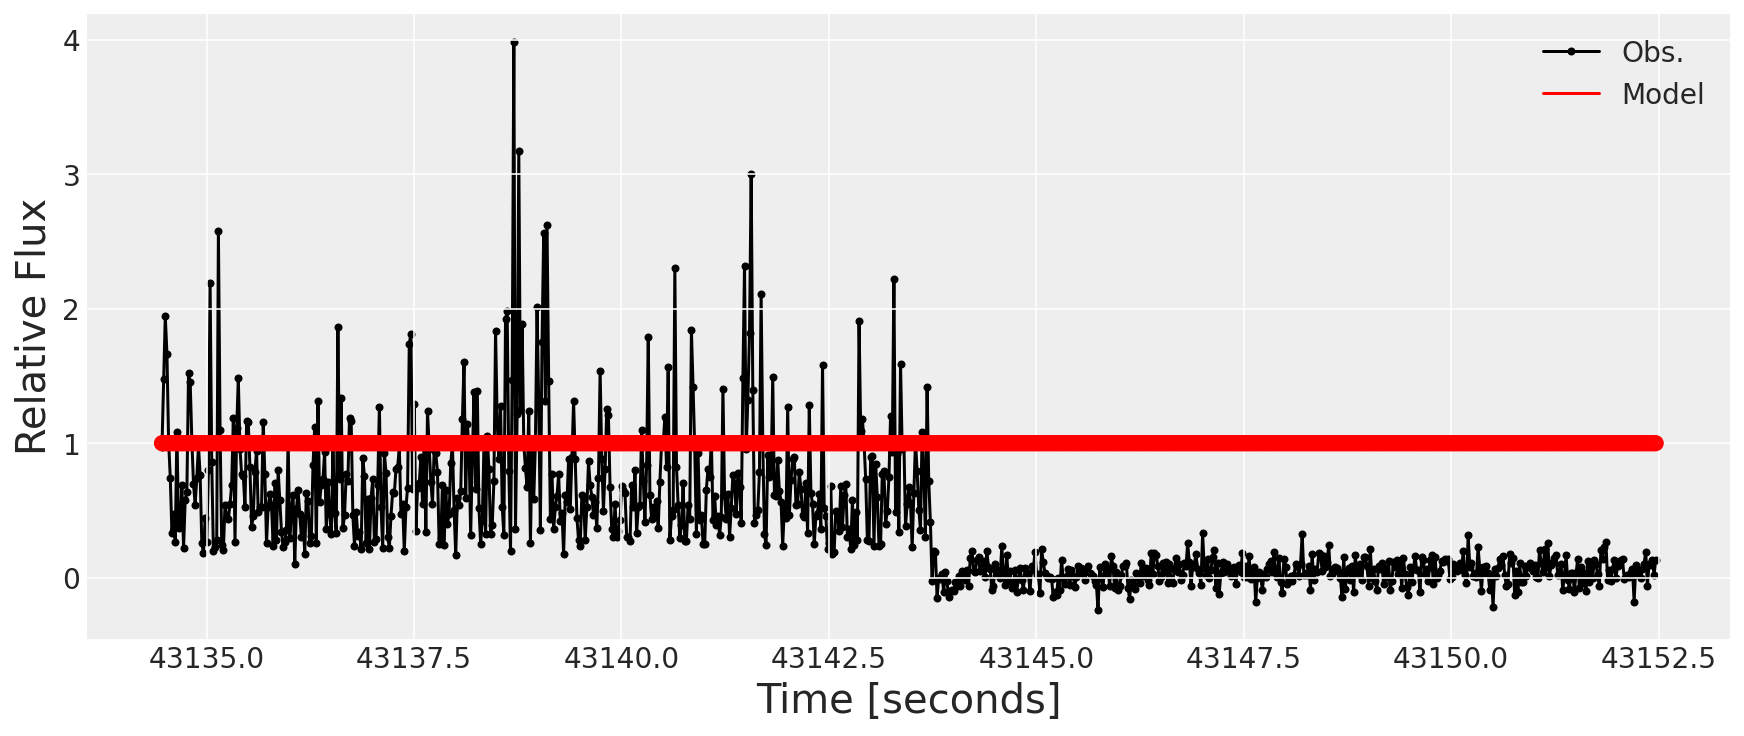

In [14]:
plt.figure(figsize=(12,5))
lc.plot_lc()
# plt.xlim(46628,46633)

{'rank': 1,
 'occultation_duration': 8.708200603723526,
 'central_time': 43148.090458586805,
 'immersion_time': 43143.73635828494,
 'emersion_time': 43152.44455888867,
 'time_err': 0.009997934103012085,
 'depth': 0.6909179644919456,
 'depth_err': 0.08960846796384615,
 'baseline': 0.7350467070461356,
 'baseline_err': 0.49586963274785195,
 'snr': 7.710409297151544,
 'occ_mask': array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, Fals

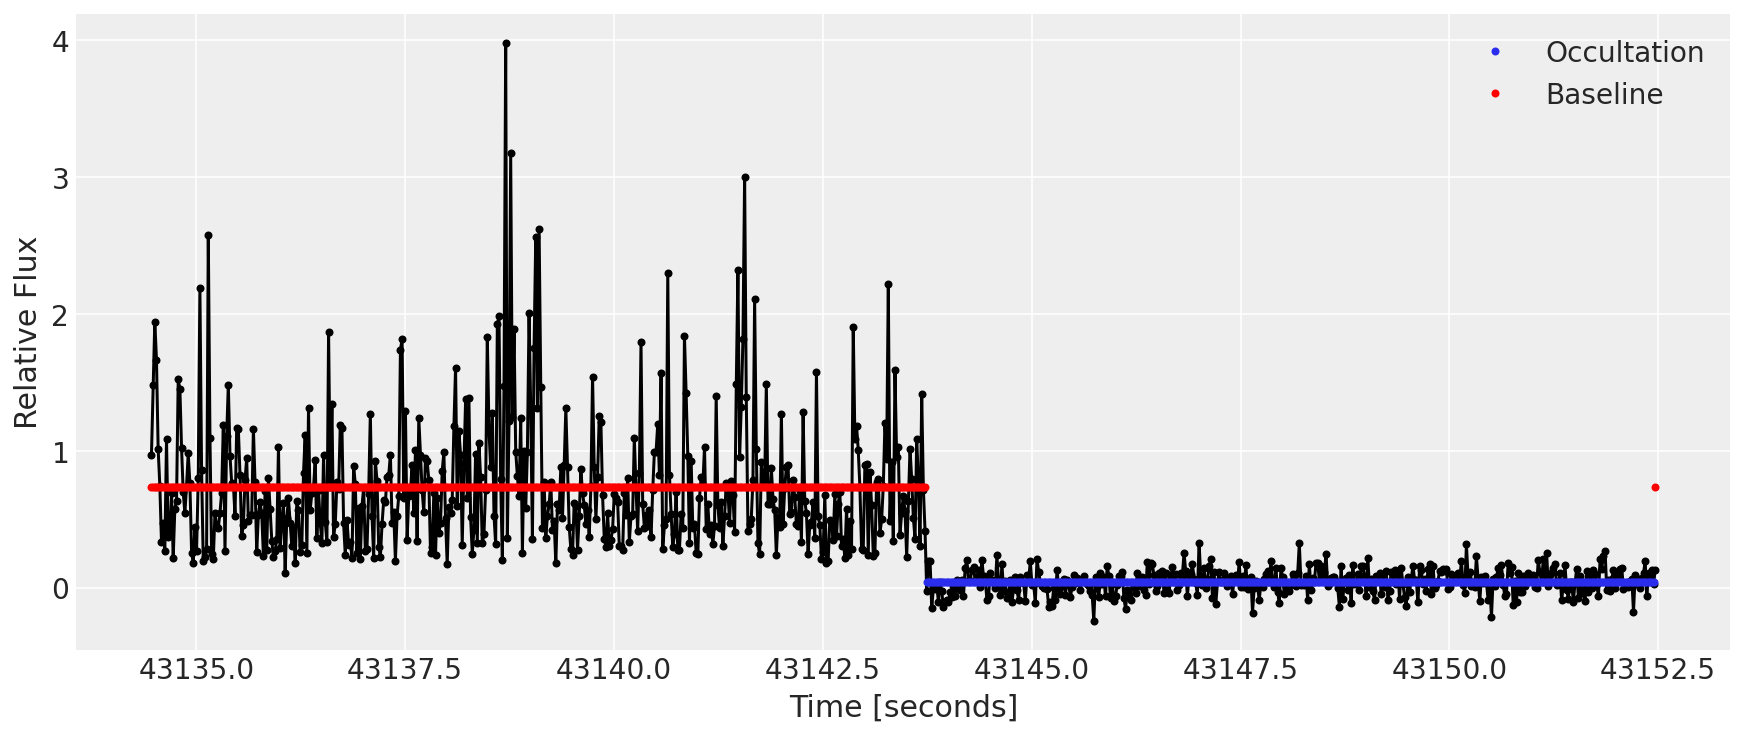

In [15]:
plt.figure(figsize=(12,5))
tes = lc.occ_detect(plot=True)
tes

## Pembuatan model

Model kurva cahaya okultasi oleh `SORA` memerlukan beberapa input:
 - Kecepatan bayangan saat *event*, dalam km/s
 - Jarak obyek, dalam AU
 - $\lambda$ pusat dan $\Delta \lambda$ (atau *bandwidth*), dalam mikron
 - Proyeksi diameter bintang pada jarak obyek, dalam km

### A. Jarak obyek penutup saat pengamatan

Untuk okultasi Bulan, obyek penutup adalah Bulan. Pengamatan dilakukan pada tanggal **31 Juli 2022 pukul 11:59:4.5 UT**. Ephemeris diambil dari https://ssd.jpl.nasa.gov/ftp/eph/planets/ascii/.

In [16]:
# load timescale dan tampilkan waktu saat ini
ts = load.timescale()

# custom waktu untuk yyyy, mm, dd, hh, mm, ss
t = ts.utc(2022, 7, 31, 11, 59, 4.5)

In [17]:
# Load the JPL ephemeris DE430 (covers 1549-2650) dan cari jarak Bumi-Bulan
planets = load('de430.bsp')
earth, moon = planets['earth'], planets['moon']

In [18]:
# posisi Bulan dari Bumi
astrometric = earth.at(t).observe(moon)
ra, dec, distance = astrometric.radec()

In [19]:
# tampilkan koordinat Bulan dan jarak Bulan dalam AU
print(ra)
print(dec)
print(distance.au)

10h 48m 54.38s
+12deg 36' 52.1"
0.0026597459176919466


In [20]:
d_moon = distance.au
d_moon

0.0026597459176919466

In [21]:
lc.set_dist(dist=d_moon)

lc.dist

0.0026597459176919466

### B. Nilai $\lambda_0$ dan *bandwidth* $\Delta \lambda$

In [22]:
lc.set_filter(central_bandpass=0.55, delta_bandpass=0.2)

print('Observational wavelength centred at {:1.3f} with a bandwidth of {:1.3f} microns'
      .format(lc.central_bandpass,lc.delta_bandpass))

Observational wavelength centred at 0.550 with a bandwidth of 0.200 microns


### C. Proyeksi diameter bintang pada jarak obyek penutup

In [23]:
lc.fresnel_scale

0.01041674081353798

In [24]:
from sora import Star
from sora.star import kervella, van_belle

In [25]:
star = Star(coord='10 46 19.3154110752 +12 44 52.229807232')


1 Gaia-EDR3 star found G=6.888296
star coordinate at J2016.0: RA=10h46m19.31354s +/- 0.0312 mas, DEC=12d44m51.7095s +/- 0.0266 mas



In [26]:
star.mag

{'G': 6.888296,
 'B': 7.013999938964844,
 'V': 6.913000106811523,
 'R': 6.849999904632568,
 'J': 6.614999771118164,
 'H': 6.570000171661377,
 'K': 6.543000221252441}

In [27]:
from sora import Observer

bosscha = Observer(name='Bosscha Observatory', code='299')

pos = star.get_position(time='2022-07-31 11:59:4.5', observer=bosscha)
print(pos.to_string('hmsdms', precision=10))

10h46m19.3125409963s +12d44m51.4961866237s


In [28]:
star.error_at(time='2022-07-31 11:59:4.5')

(<Quantity 0.27004211 mas>, <Quantity 0.24141593 mas>)

In [29]:
diameter = star.apparent_diameter(distance=d_moon)

diameter

Apparent diameter using Kervella et al. (2004)


<Quantity 0.00033241 km>

In [30]:
diameter.value

0.0003324109924463602

In [31]:
lc.set_star_diam(d_star=diameter.value)

### D. Kecepatan bayangan Bulan di Bumi

Bulan bergerak relatif terhadap bintang latar belakang dengan kecepatan 0.55 arcsec/s. Ubah nilai ini ke dalam km/s. kalikan angka ini dengan $\sin \theta$ di mana $\theta$ adalah sudut kontak (*contact angle*, CA). Pada pekerjaan ini, nilai kecepatan bayangan diambil dari perangkat lunak `OCCULT v4`

In [32]:
from astropy.coordinates import Angle
# ang_vel = 0.55*u.arcsec # dalam arcsec/s

# lin_vel = distance.km * np.tan(ang_vel)

kms = u.km/u.s
lin_vel = 0.9273*kms # dari Occult v4

lin_vel

<Quantity 0.9273 km / s>

In [33]:
lc.set_vel(vel=lin_vel.value)

{'rank': 1,
 'occultation_duration': 8.708200603723526,
 'central_time': 43148.090458586805,
 'immersion_time': 43143.73635828494,
 'emersion_time': 43152.44455888867,
 'time_err': 0.009997934103012085,
 'depth': 0.6909179644919456,
 'depth_err': 0.08960846796384615,
 'baseline': 0.7350467070461356,
 'baseline_err': 0.49586963274785195,
 'snr': 7.710409297151544,
 'occ_mask': array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, Fals

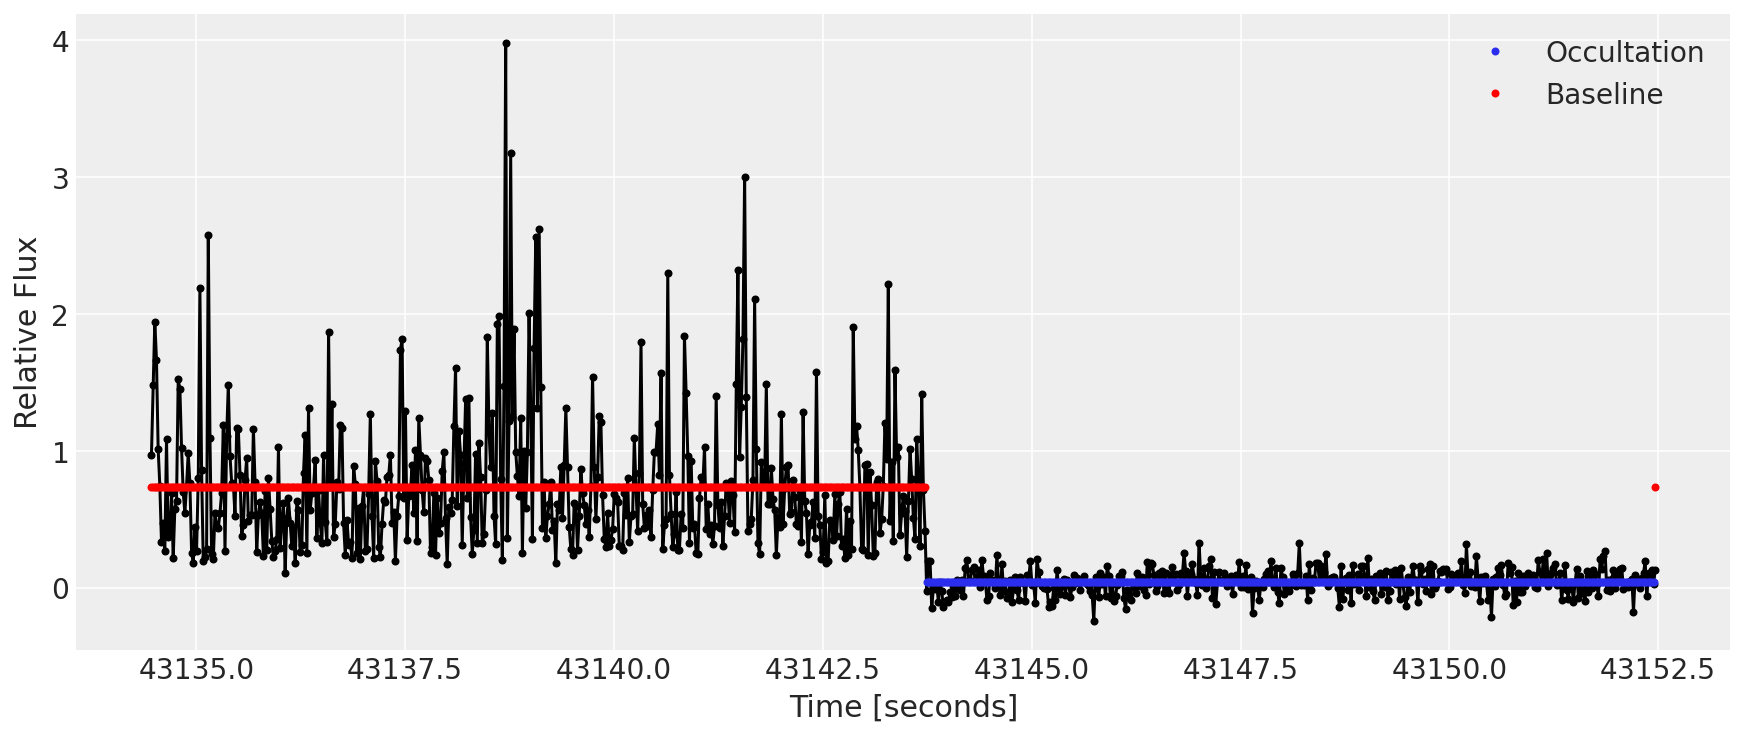

In [34]:
plt.figure(figsize=(12,5))
tes2 = lc.occ_detect(plot=True)

tes2

**Parameter untuk model**

In [35]:
immersion_time = 43143.736  # seconds relative to tref
emersion_time  = 43152.444  # seconds relative to tref
opacity = 1.0            # 1.0 == opaque; 0.0 == transparent

tmin = immersion_time  - 5 # seconds relative to tref
tmax = immersion_time   + 5 # seconds relative to tref

mask = (lc.time > tmin) & (lc.time < tmax)

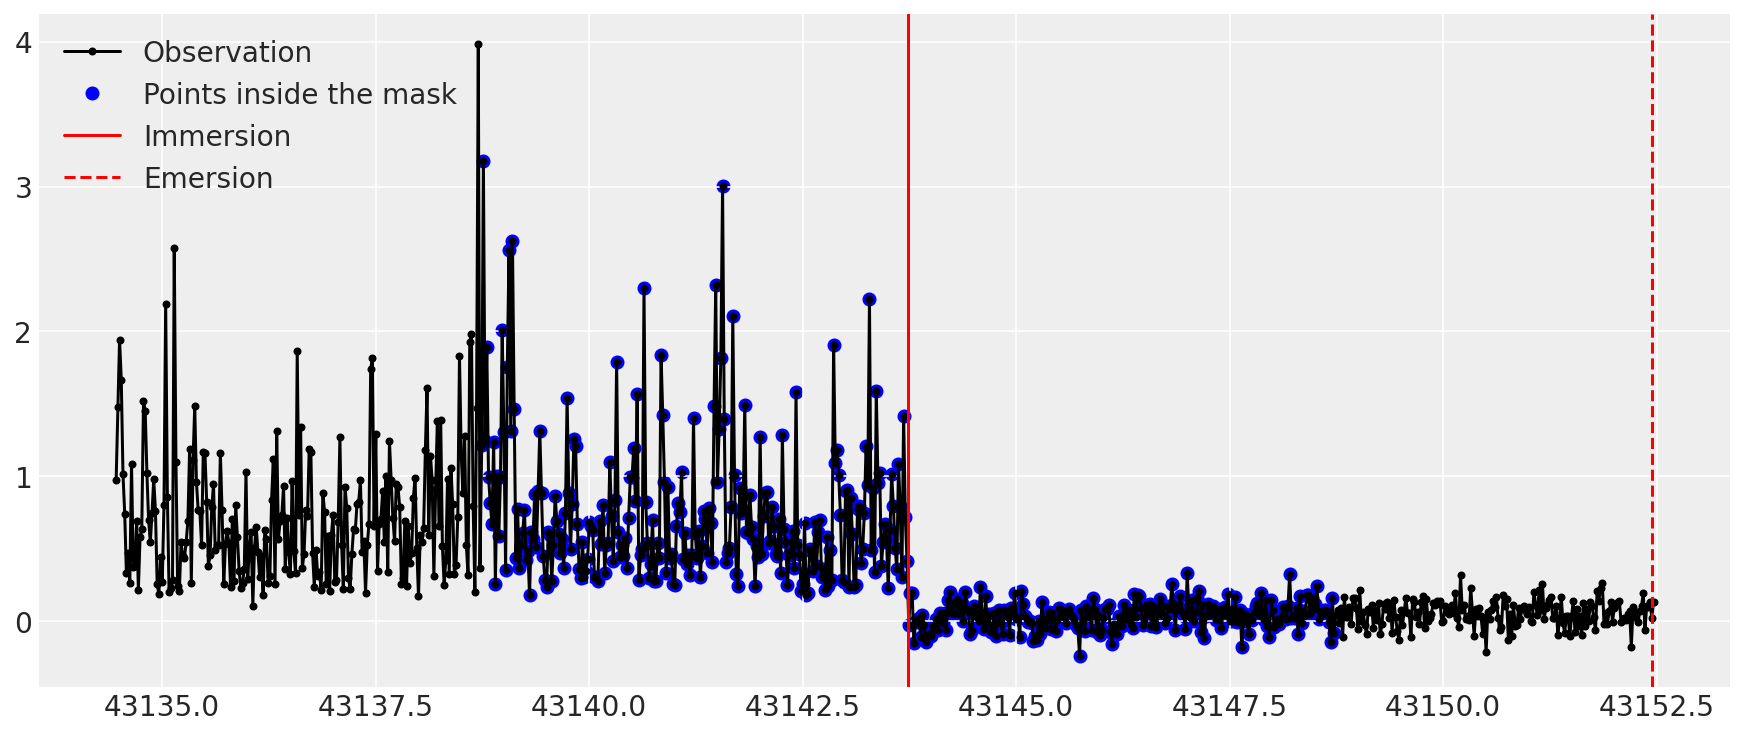

In [36]:
plt.figure(figsize=(12,5))
plt.plot(lc.time,lc.flux,'k.-',zorder=1,label='Observation')
plt.plot(lc.time[mask],lc.flux[mask],'bo',zorder=0,label='Points inside the mask')
plt.axvline(immersion_time,color='r',linestyle='-',label='Immersion')
plt.axvline(emersion_time,color='r',linestyle='--',label='Emersion')
plt.legend()

In [37]:
lc_chi2 = lc.occ_lcfit(loop=1000)

LightCurve fit: |████████████████████████████████████████|  - 100% 


In [38]:
print(lc_chi2)

Minimum chi-square: 600.813
Number of fitted points: 901
Number of fitted parameters: 2
Minimum chi-square per degree of freedom: 0.668

immersion:
    1-sigma: 43143.717 +/- 0.025
    3-sigma: 43143.736 +/- 0.050

emersion:
    1-sigma: 43152.477 +/- 0.018
    3-sigma: 43152.444 +/- 0.050



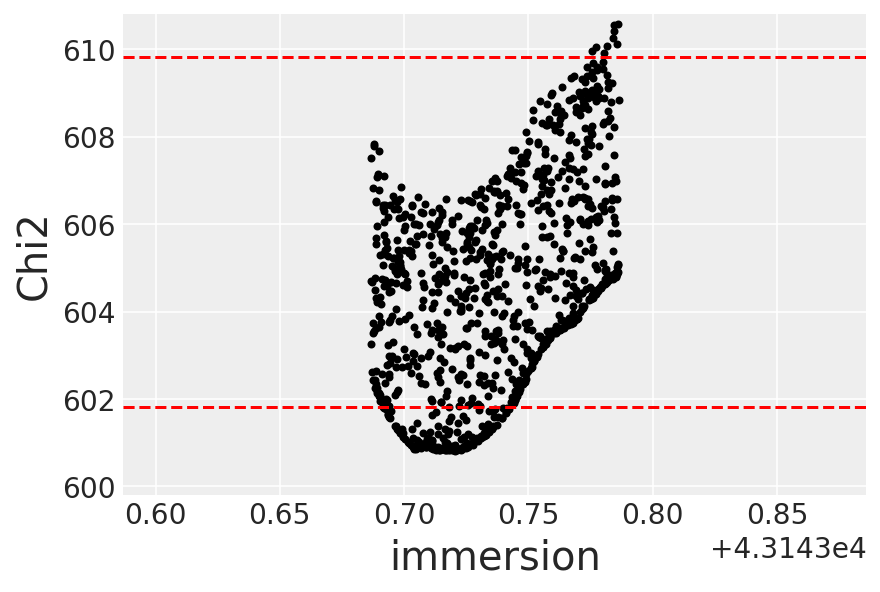

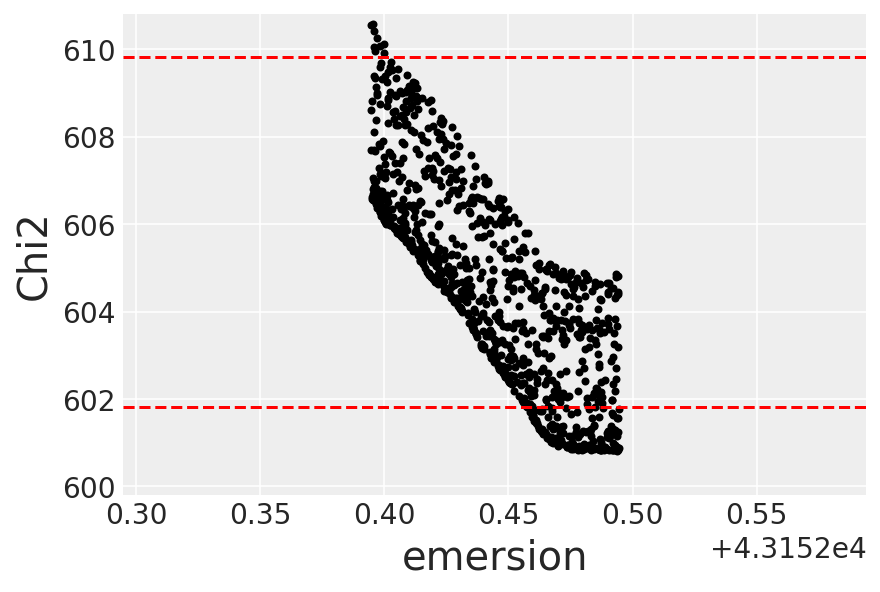

In [39]:
lc_chi2.plot_chi2()

(-0.5, 3.0)

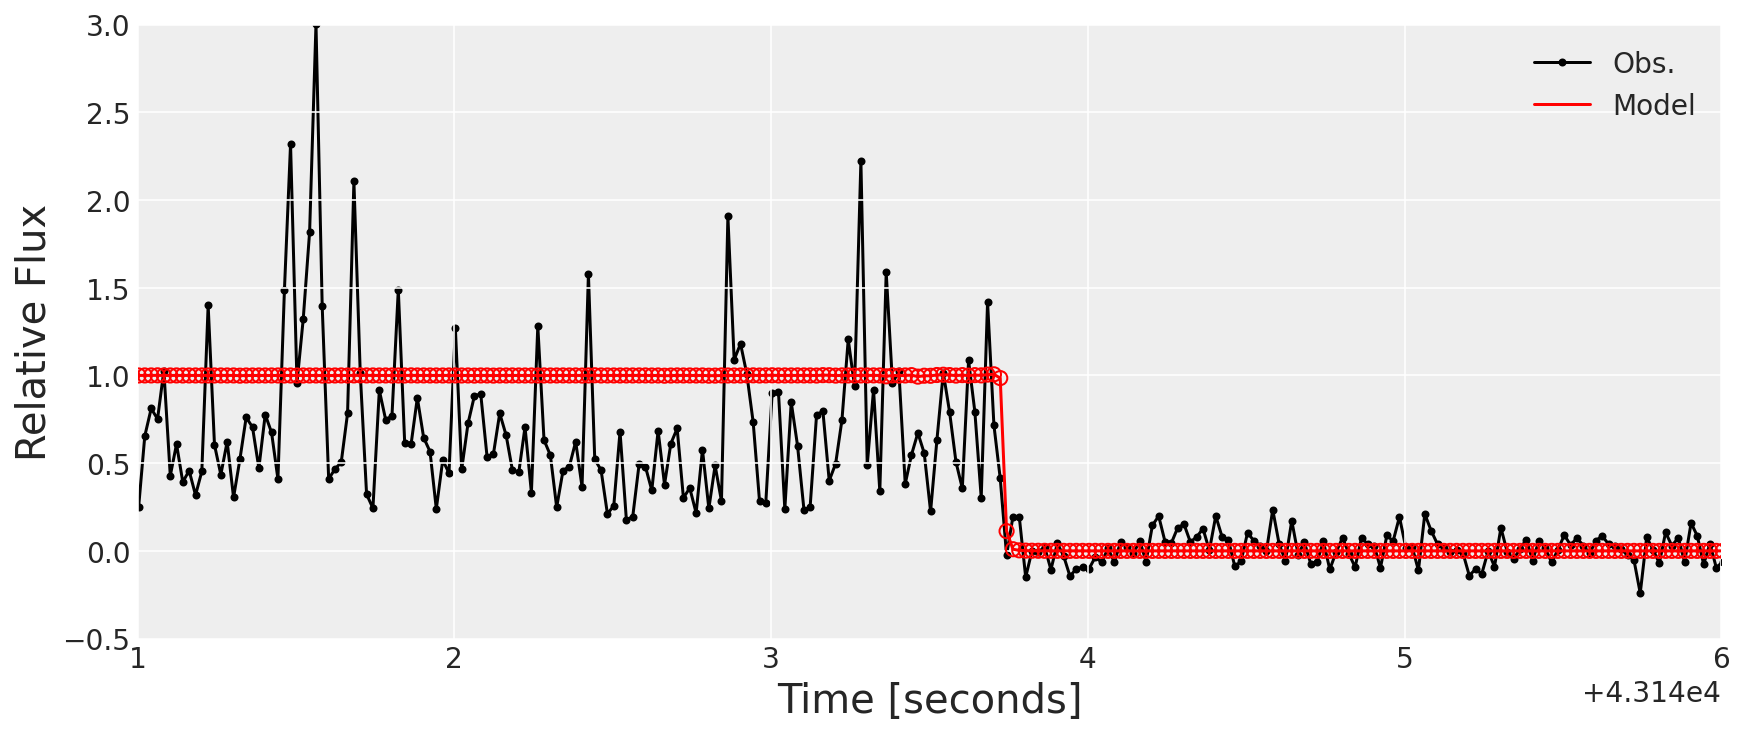

In [49]:
plt.figure(figsize=(12,5))
lc.occ_model(immersion_time, emersion_time, opacity, mask)

lc.plot_lc()
plt.xlim(43141,43146)
plt.ylim(-0.5,3)

Karena pada pengamatan ini tidak mengalami *emmersion*, maka plot *immersion* saja.

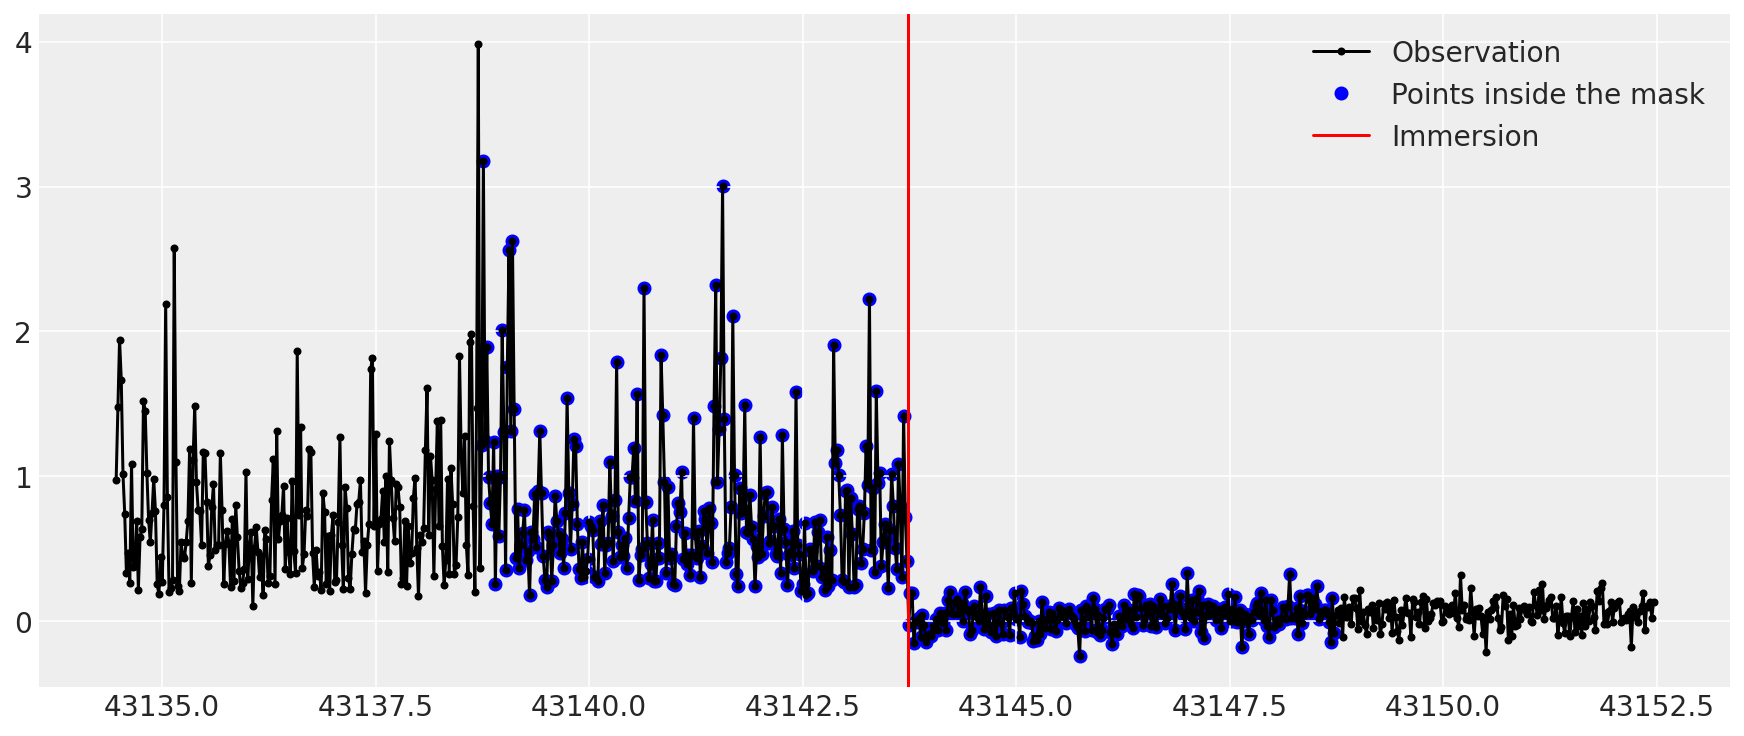

In [41]:
plt.figure(figsize=(12,5))
plt.plot(lc.time,lc.flux,'k.-',zorder=1,label='Observation')
plt.plot(lc.time[mask],lc.flux[mask],'bo',zorder=0,label='Points inside the mask')
plt.axvline(immersion_time, color='r',linestyle='-',label='Immersion')
plt.legend()

In [42]:
lc_chi2_imm = lc.occ_lcfit(tmin=tmin, tmax=tmax, immersion_time=immersion_time, loop=1000)

LightCurve fit: |████████████████████████████████████████|  - 100% 


In [43]:
print(lc_chi2_imm)

Minimum chi-square: 329.879
Number of fitted points: 500
Number of fitted parameters: 1
Minimum chi-square per degree of freedom: 0.661

immersion:
    1-sigma: 43143.720 +/- 0.023
    3-sigma: 43143.736 +/- 0.040



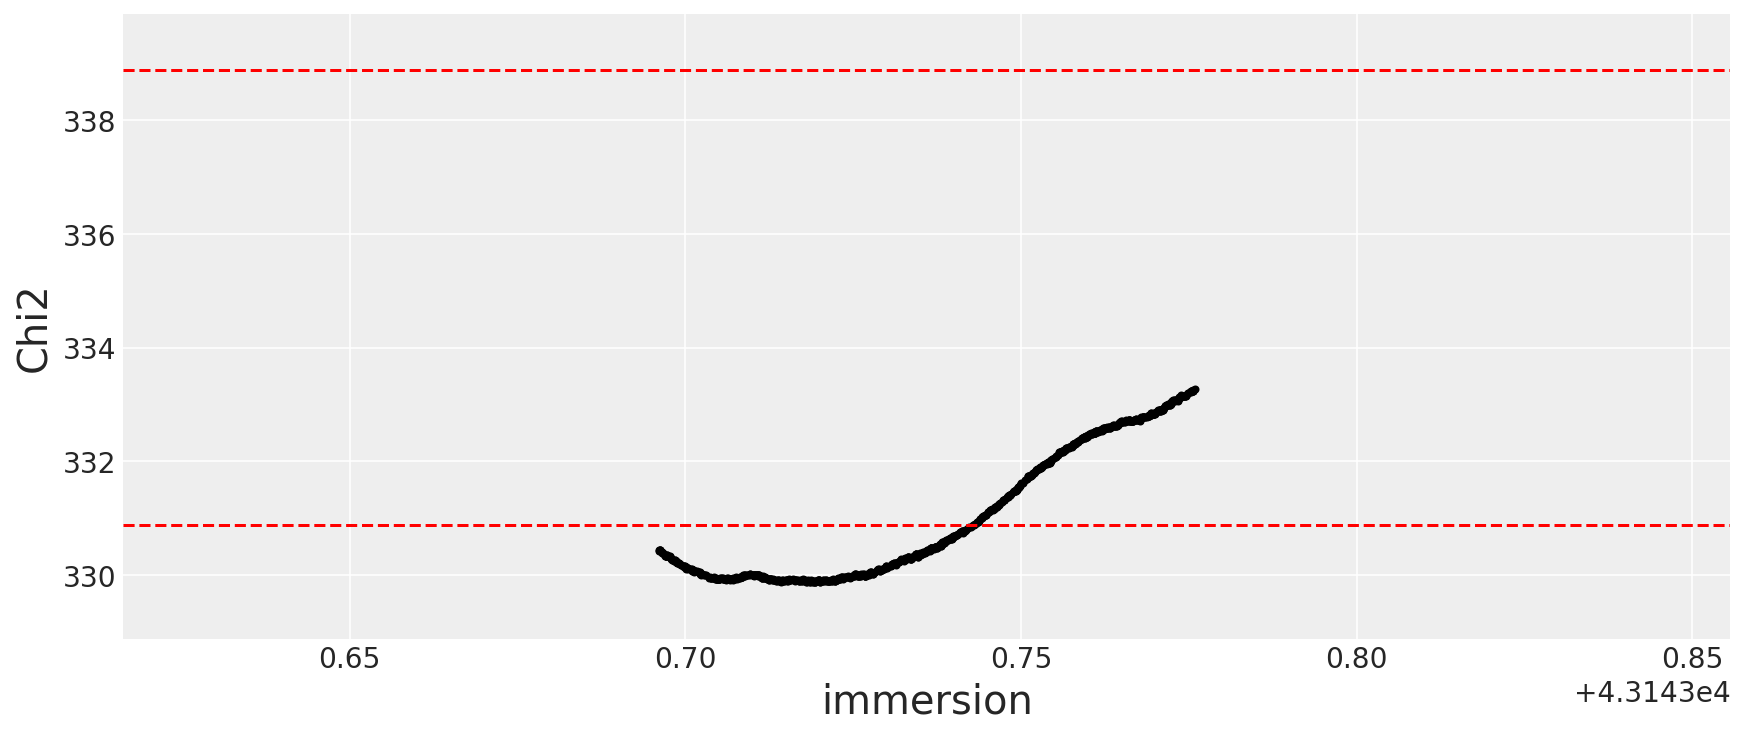

In [44]:
plt.figure(figsize=(12,5))
lc_chi2_imm.plot_chi2()

In [45]:
print(lc)

Light curve name: HD 93273
Initial time: 2022-08-01 11:58:54.462 UTC
End time:     2022-08-01 11:59:12.465 UTC
Duration:     0.300 minutes
Time offset:  0.000 seconds

Exposure time:    0.0200 seconds
Cycle time:       0.0200 seconds
Num. data points: 901

Bandpass:             0.550 +/- 0.200 microns
Object Distance:      0.00 AU
Used shadow velocity: 0.927 km/s
Fresnel scale:        0.011 seconds or 0.01 km
Stellar size effect:  0.000 seconds or 0.00 km
Inst. response:       0.020 seconds or 0.02 km
Dead time effect:     -0.000 seconds or -0.00 km
Model resolution:     0.001 seconds or 0.00 km
Modelled baseflux:    0.735
Modelled bottomflux:  0.309
Light curve sigma:    0.503

Immersion time: 2022-08-01 11:59:03.720 UTC +/- 0.023 seconds
Emersion time:  2022-08-01 11:59:12.477 UTC +/- 0.018 seconds

Monte Carlo chi square fit.

Minimum chi-square: 329.879
Number of fitted points: 500
Number of fitted parameters: 1
Minimum chi-square per degree of freedom: 0.661

immersion:
    1-sigm

(43142.0, 43145.0)

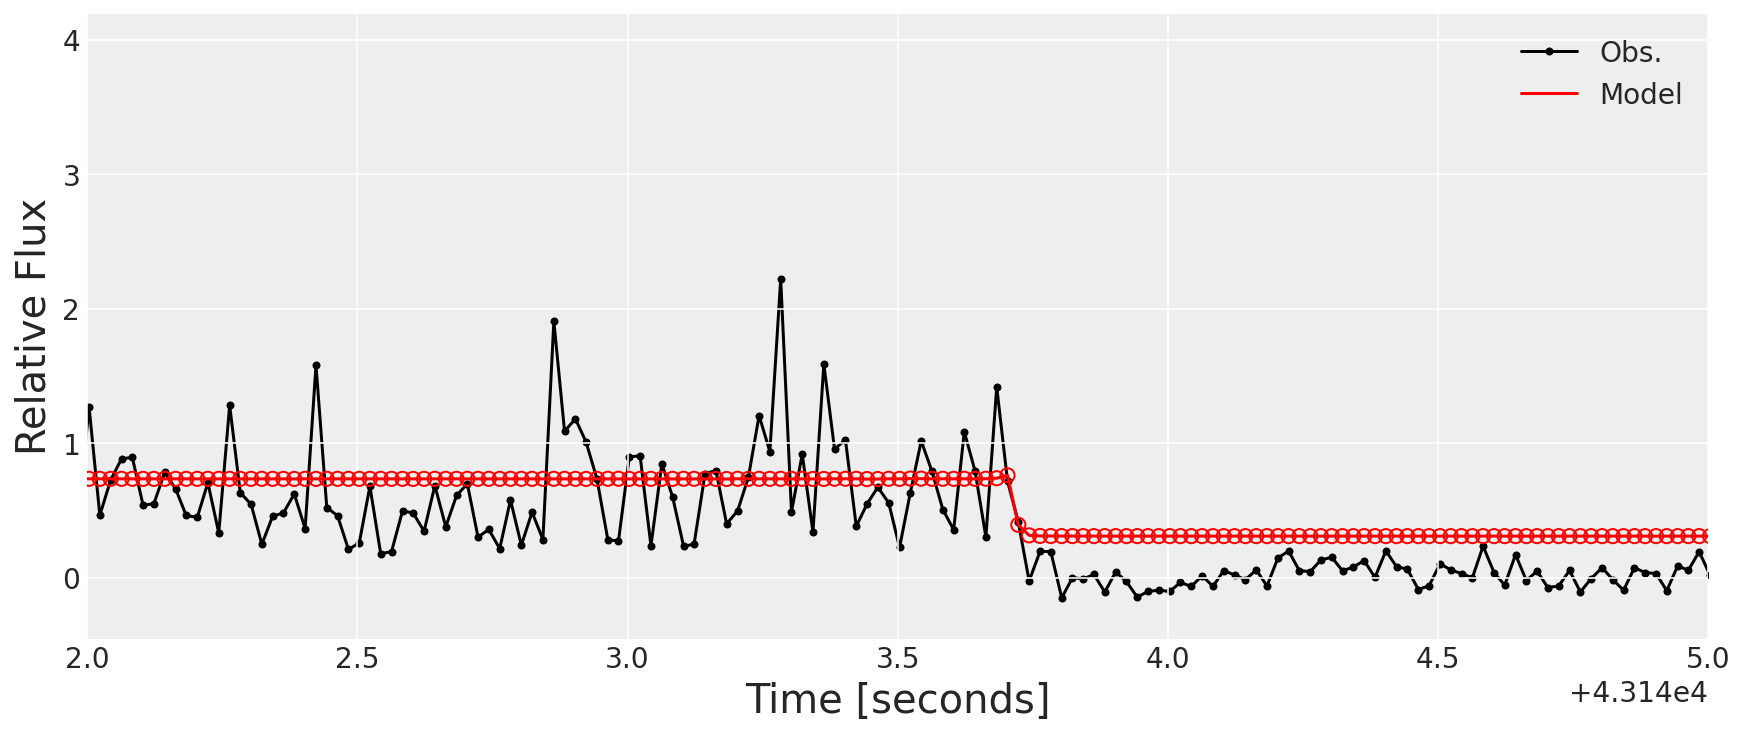

In [46]:
plt.figure(figsize=(12,5))
lc.plot_lc()
plt.xlim(43142, 43145)

(-0.25, 1.5)

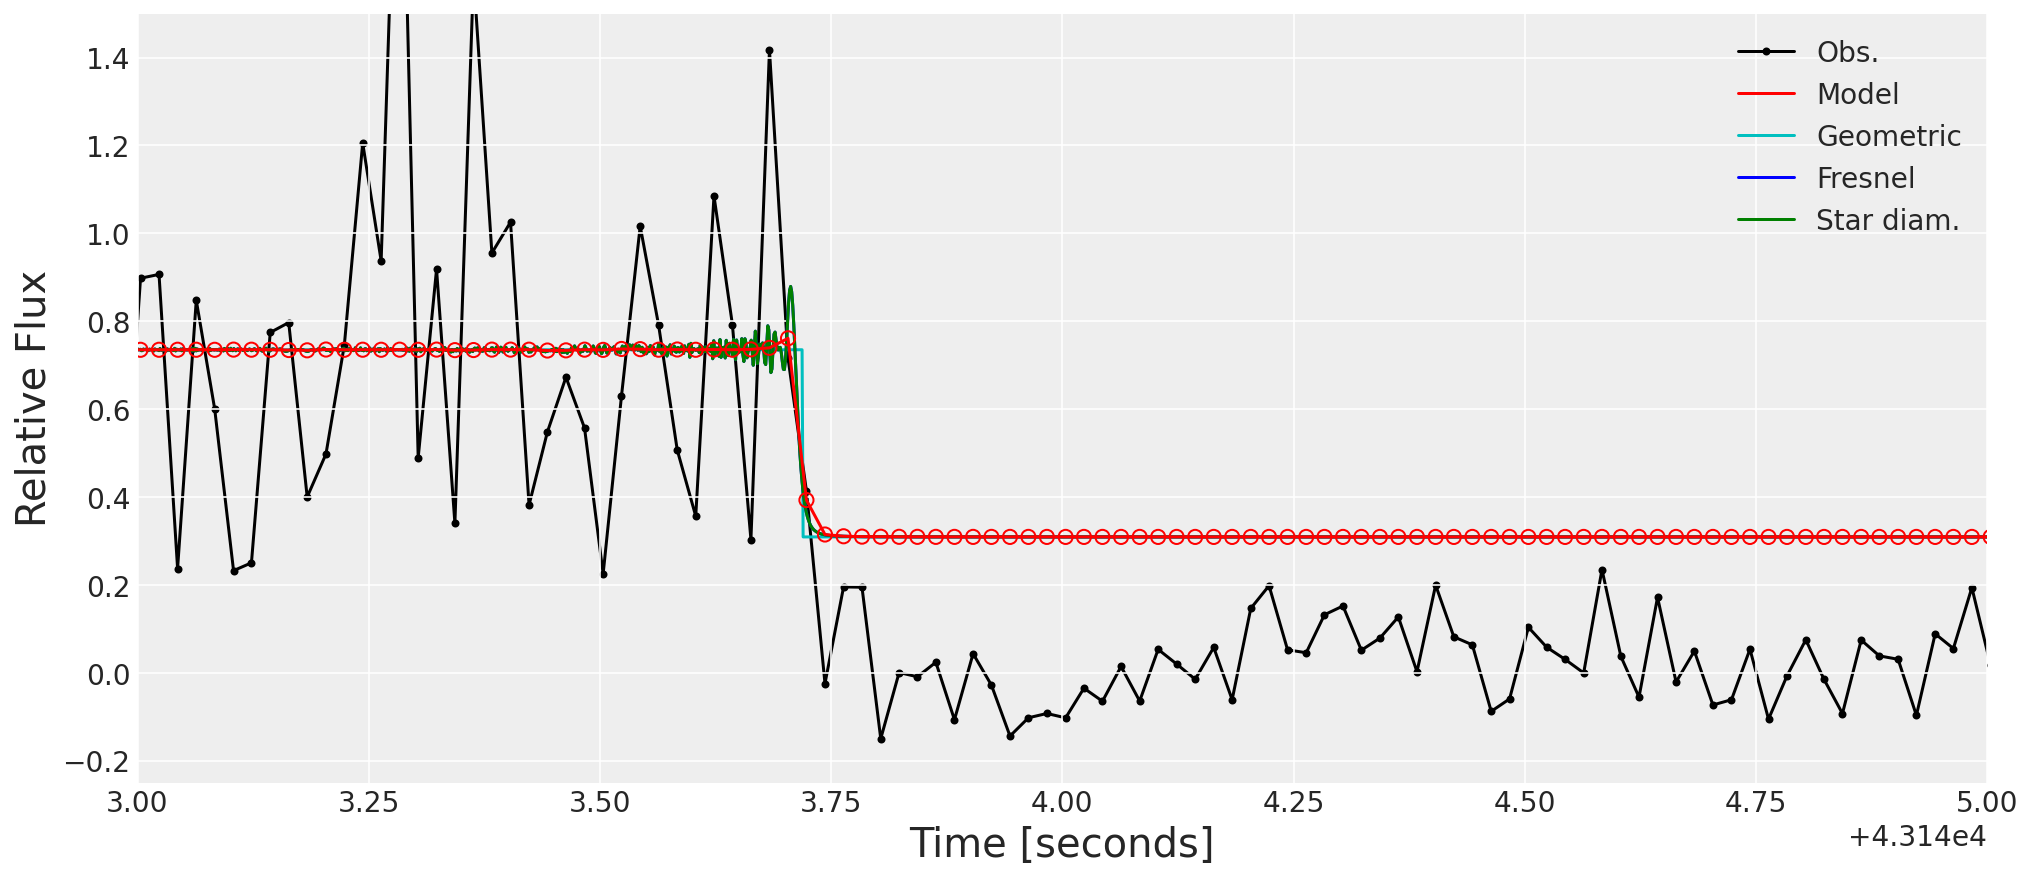

In [47]:
plt.figure(figsize=(14,6))
lc.plot_lc()
lc.plot_model()

plt.xlim(43143,43145)
plt.ylim(-0.25, 1.5)